# **BANA 277 Custumer & Social Analysis Final Project**

**HR Analysis**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
import networkx as nx

In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

**Read The Data**

In [ ]:
df = pd.read_csv('IBM HR Data new.csv')
df.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [ ]:
df.isnull().sum()[df.isnull().sum()!=0]

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [ ]:
Null_values_percentage=(df.isnull().sum().sum()/len(df))*100
Null_values_percentage

1.5019627922853729

**Statistical Analysis for Continuous Variables**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,13.681777,1186.544372,1.0,2.0,3.0,4.0,129588.0
JobInvolvement,23427.0,2.733811,0.836860,1.0,2.0,3.0,3.0,54.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,3.887779,155.332904,0.0,1.0,2.0,4.0,23258.0
PerformanceRating,23426.0,3.155852,0.371215,3.0,3.0,3.0,3.0,13.0
RelationshipSatisfaction,23428.0,2.713334,1.080030,1.0,2.0,3.0,4.0,4.0


**Dropping Null Values.**

In [ ]:
df=df.dropna() 

check

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

# Data Visualization

Check Numerical and Categorical Columns Presnet In Dataset

In [ ]:
numeric_ = df.select_dtypes(exclude=['object']).copy()
categor_ = df.select_dtypes(['object']).copy()

In [ ]:
c

In [ ]:
corr_ca= categor_.corr()

**Show the Numerical Variables which have correlation > 0.4**

<AxesSubplot:>

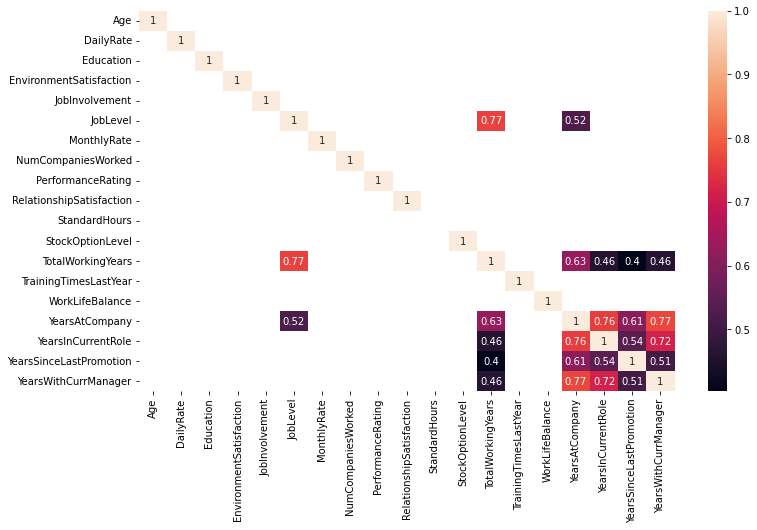

In [ ]:
plt.subplots(figsize=[12,7])
sns.heatmap(corr,annot=True,mask=numeric_.corr()<0.4)

**Majority of employees lie between the age range of 30 to 40**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Employee Age Distribution')

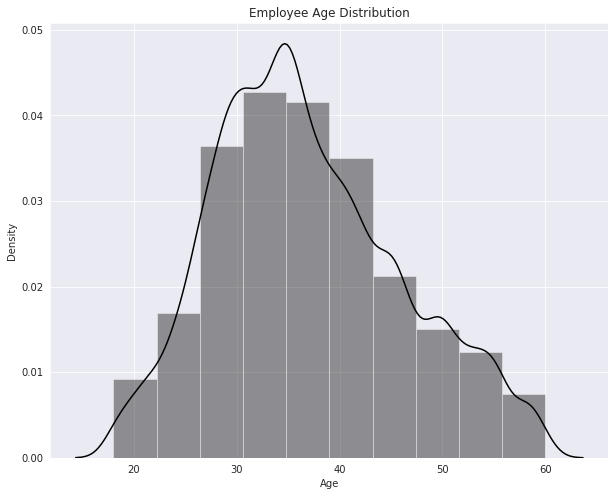

In [ ]:
plt.figure(figsize=[10,8])
sns.set_style("darkgrid")
sns.distplot(df['Age'],hist=True,kde=True,color='k',bins=10)
plt.title("Employee Age Distribution")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Research Director'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Laboratory Technician'),
  Text(5, 0, 'Research Scientist'),
  Text(6, 0, 'Manufacturing Director'),
  Text(7, 0, 'Healthcare Representative'),
  Text(8, 0, 'Human Resources')])

<Figure size 720x576 with 0 Axes>

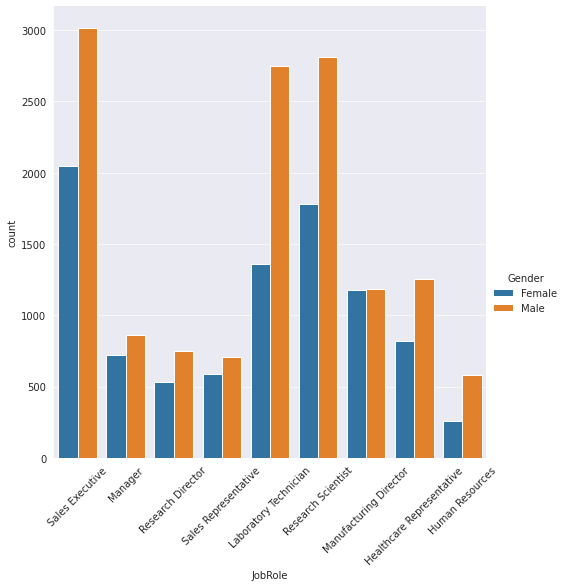

In [ ]:
plt.figure(figsize=[10,8])
sns.set_style("darkgrid")
sns.catplot(x='JobRole',hue='Gender',kind='count',data=df,height=7)
plt.xticks(rotation=45)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Year of Each JobRole ')

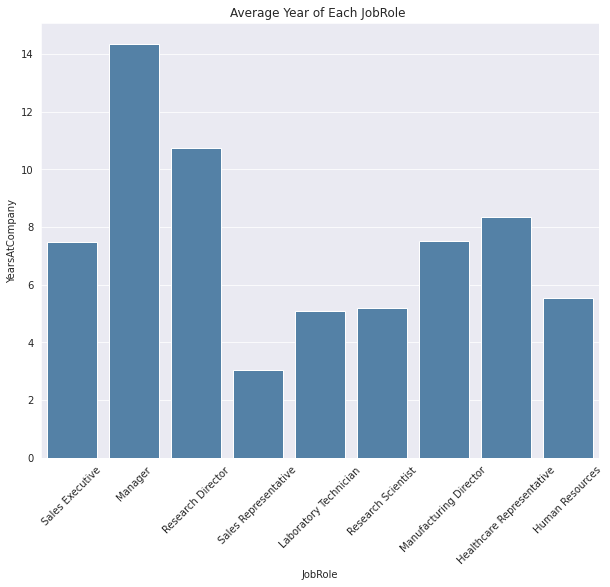

In [ ]:
plt.figure(figsize=[10,8])
sns.set_style("darkgrid")
sns.barplot(df.JobRole,df.YearsAtCompany,data=df,color='steelblue',ci=None)
plt.xticks(rotation=45)
plt.title("Average Year of Each JobRole ")

Text(0.5, 1.0, 'Average Monthly Income of Each Department ')

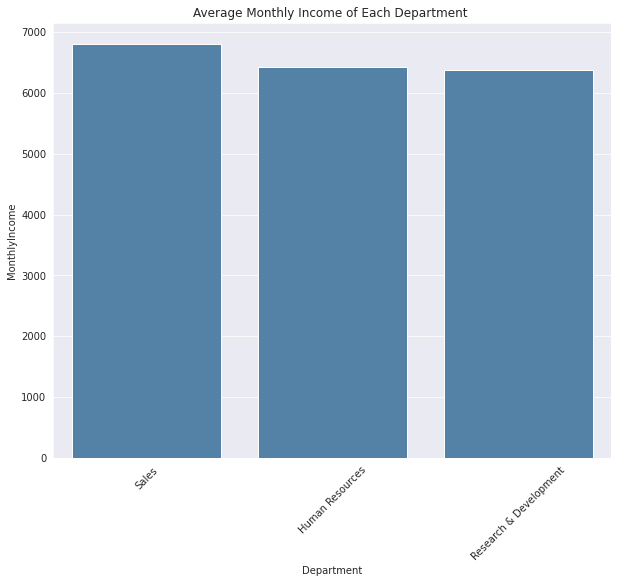

In [ ]:
# Change data type to integer  
df['MonthlyIncome']=df['MonthlyIncome'].astype(int)
# Calculate the average monthly income by department
avg_income_by_dept = df.groupby('Department')['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=[10,8])
sns.set_style("darkgrid")
sns.barplot(x ="Department",y="MonthlyIncome" ,data=avg_income_by_dept,color='steelblue',order = avg_income_by_dept.sort_values('MonthlyIncome',ascending = False).Department)
plt.xticks(rotation=45)
plt.title("Average Monthly Income of Each Department ")

Text(0.5, 1.0, 'Average Monthly Income of Each Job Role ')

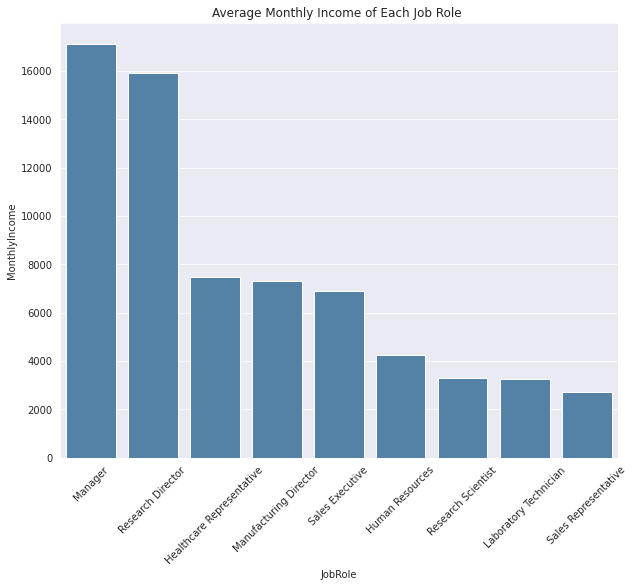

In [ ]:
# Calculate the average monthly income by Jobrole
avg_income_by_JobRole = df.groupby('JobRole')['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=[10,8])
sns.set_style("darkgrid")
sns.barplot(x ="JobRole",y="MonthlyIncome" ,data=avg_income_by_JobRole,color='steelblue',order = avg_income_by_JobRole.sort_values('MonthlyIncome',ascending = False).JobRole)
plt.xticks(rotation=45)
plt.title("Average Monthly Income of Each Job Role ")

# **Social Network Analysis**





try 1. Based on JobRole, Department, YearAtCompany

In [ ]:
# Identify variables that define employee characteristics
employee_attributes = ['JobRole', 'Department', 'YearsAtCompany']

# Create a dictionary to store the attributes for each employee
employee_dict = {}
for i, row in df.iterrows():
    employee_id = row['EmployeeNumber']
    attributes = {attr: row[attr] for attr in employee_attributes}
    employee_dict[employee_id] = attributes

take too much time to execute below code.
Need to modify

In [ ]:
# Define a function to calculate the similarity between two employee attributes
def similarity(attr1, attr2):
    return int(attr1 == attr2)

# Create an empty list to store edges
edges = []

# Loop over all pairs of employees and calculate their similarity
for i, emp1 in enumerate(employee_dict):
    for j in range(i+1, len(employee_dict)):
        emp2 = list(employee_dict.keys())[j]
        similarity_score = sum(similarity(employee_dict[emp1][attr], employee_dict[emp2][attr])
                               for attr in employee_attributes)
        
        if similarity_score > 0:
            edges.append((emp1, emp2))

KeyboardInterrupt: ignored

In [ ]:
edges_df = pd.DataFrame(edges, columns=['Source', 'Target'])

In [ ]:
# Create an empty graph
G = nx.Graph()

# Add nodes and edges to the graph
G.add_nodes_from(employee_dict.keys())
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

# **Here are some possible ways we could define edges on there variable.**


1.similar characteristics : use data on gender, marital status, or job role to identify which employees are similar, and then define edges between those employees.

2.Knowledge or skills : use data on training times last year or years at the company to identify which employees have had similar experiences, and then define edges between those employees.